# Reports per State 2023 (500k) 

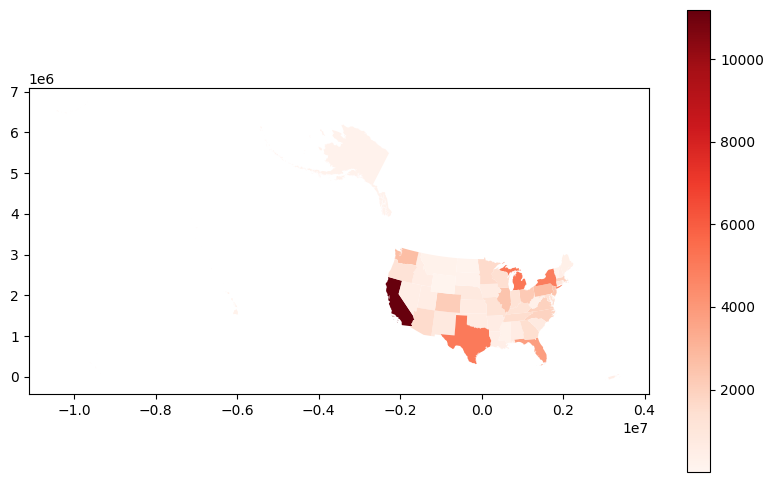

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


data_2023 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2023VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)

# Load the shapefile (replace 'path_to_shapefile' with the actual path to the shapefile)
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Make sure your state column is named the same way as in the shapefile
# It might be necessary to adjust the state names/abbreviations to match the shapefile
states = data_2023['STATE'].value_counts()

# Merge the geodataframe with the states data
merged_gdf = gdf.set_index('STUSPS').join(states)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds')  # 'count' is the column name in your states Series
plt.show()

# Reports per State 2023 (20m)

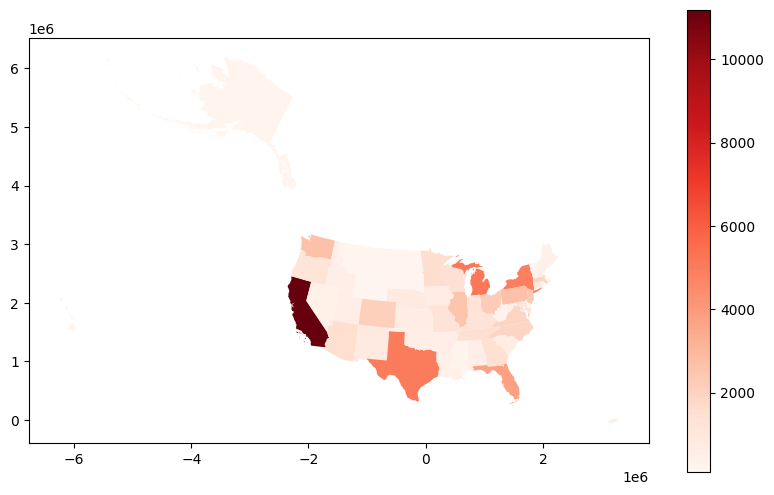

In [11]:
import geopandas as gpd

data_2023 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2023VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)

# Load the shapefile (replace 'path_to_shapefile' with the actual path to the shapefile)
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Make sure your state column is named the same way as in the shapefile
# It might be necessary to adjust the state names/abbreviations to match the shapefile
states = data_2023['STATE'].value_counts()

# Merge the geodataframe with the states data
merged_gdf = gdf.set_index('STUSPS').join(states)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))


merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds')  # 'count' is the column name in your states Series
plt.show()

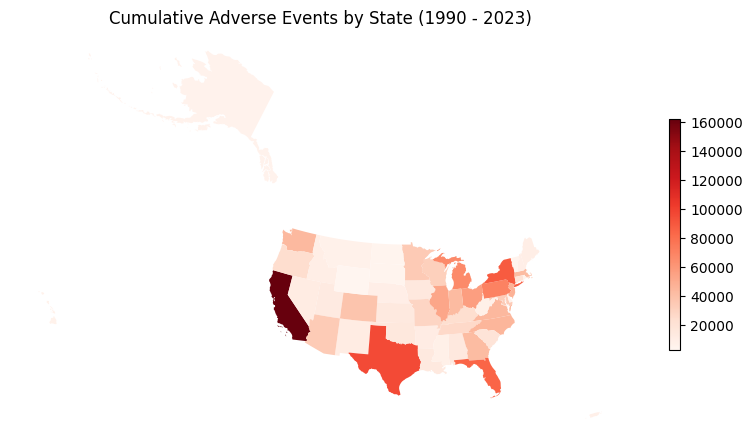

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile for US states
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Initialize a Series to store cumulative state counts
cumulative_state_counts = pd.Series(dtype=int)

for year in range(1990, 2024):
    try:
        data_path = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
        data = pd.read_csv(data_path, encoding="Iso-8859-1", low_memory=False)
        state_counts = data['STATE'].value_counts()
        cumulative_state_counts = cumulative_state_counts.add(state_counts, fill_value=0)
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Merge with geodataframe
merged_gdf = gdf.set_index('STUSPS').join(cumulative_state_counts.rename('count'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds', legend_kwds={'shrink': 0.5})
plt.title('Cumulative Adverse Events by State (1990 - 2023)')
ax.set_axis_off()
plt.show()


In [ ]:
Bevölkerung berücksichtigen einwohner